In [27]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [41]:
#The dataframes given below is the stock data of various banks from Jan 1st 2005 to Jan 1st 2021.
# Bank of America
BAC = pd.read_csv("C:/Users/ABHI/Downloads/BAC.csv")

# CitiGroup
C = pd.read_csv("C:/Users/ABHI/Downloads/C.csv")

# Goldman Sachs
GS = pd.read_csv("C:/Users/ABHI/Downloads/GS.csv")

# JPMorgan Chase
JPM = pd.read_csv("C:/Users/ABHI/Downloads/JPM.csv")

# Morgan Stanley
MS = pd.read_csv("C:/Users/ABHI/Downloads/MS.csv")

# Wells Fargo
WFC = pd.read_csv("C:/Users/ABHI/Downloads/WFC.csv")

In [42]:
banks = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [43]:
stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=banks)

In [44]:
stocks.columns.names = ['Bank Ticker','Stock Info']

In [45]:
stocks.head()

Bank Ticker         BAC                                              \
Stock Info         Date       Open       High        Low      Close   
0            2005-01-03  46.660000  46.950001  46.180000  46.459999   
1            2005-01-04  46.410000  46.730000  45.740002  45.820000   
2            2005-01-05  45.639999  45.939999  45.250000  45.290001   
3            2005-01-06  45.419998  45.630001  44.990002  45.220001   
4            2005-01-07  45.299999  45.360001  44.720001  44.730000   

Bank Ticker                                C                          ...  \
Stock Info   Adj Close    Volume        Date        Open        High  ...   
0            32.445038  10238100  2005-01-03  490.000000  490.000000  ...   
1            31.998093  10264100  2005-01-04  482.799988  487.700012  ...   
2            31.627987  14796100  2005-01-05  480.500000  487.799988  ...   
3            31.579092  14602200  2005-01-06  488.000000  492.399994  ...   
4            31.236916  10547200  2005-01-07  491.000000  491.100006  ...   

Bank Ticker         MS                             WFC                        \
Stock Info       Close  Adj Close   Volume        Date       Open       High   
0            55.900002  34.422142  5105800  2005-01-03  31.115000  31.165001   
1            55.299999  34.052692  6100300  2005-01-04  30.975000  31.250000   
2            54.980000  33.855633  5072100  2005-01-05  31.040001  31.375000   
3            56.279999  34.656139  5991400  2005-01-06  31.049999  31.150000   
4            56.060001  34.520660  4269900  2005-01-07  31.170000  31.280001   

Bank Ticker                                            
Stock Info         Low      Close  Adj Close   Volume  
0            30.875000  30.955000  19.353729  8168200  
1            30.885000  30.980000  19.369364  9241400  
2            30.975000  31.014999  19.391243  7694600  
3            30.900000  31.125000  19.460018  8887600  
4            31.030001  31.084999  19.435011  6573200  

[5 rows x 42 columns]

In [46]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, Date)       4028 non-null   object 
 1   (BAC, Open)       4028 non-null   float64
 2   (BAC, High)       4028 non-null   float64
 3   (BAC, Low)        4028 non-null   float64
 4   (BAC, Close)      4028 non-null   float64
 5   (BAC, Adj Close)  4028 non-null   float64
 6   (BAC, Volume)     4028 non-null   int64  
 7   (C, Date)         4028 non-null   object 
 8   (C, Open)         4028 non-null   float64
 9   (C, High)         4028 non-null   float64
 10  (C, Low)          4028 non-null   float64
 11  (C, Close)        4028 non-null   float64
 12  (C, Adj Close)    4028 non-null   float64
 13  (C, Volume)       4028 non-null   int64  
 14  (GS, Date)        4028 non-null   object 
 15  (GS, Open)        4028 non-null   float64
 16  (GS, High)        4028 non-null   float64


In [8]:
# Gives the maximum close price of each bank stocks from Jan 1st 2005 to Jan 1st 2021.
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

In [9]:
#Creating a new dataframe to store the returns of the stock.
returns = pd.DataFrame()

In [47]:
for i in tickers:
    returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.013775,-0.008494,-0.006479,-0.018902,-0.010734,0.000808
2,-0.011567,0.012537,-0.004507,0.002083,-0.005787,0.001130
3,-0.001546,0.009699,0.013776,0.005716,0.023645,0.003547
4,-0.010836,-0.005722,-0.004276,-0.008008,-0.003909,-0.001285


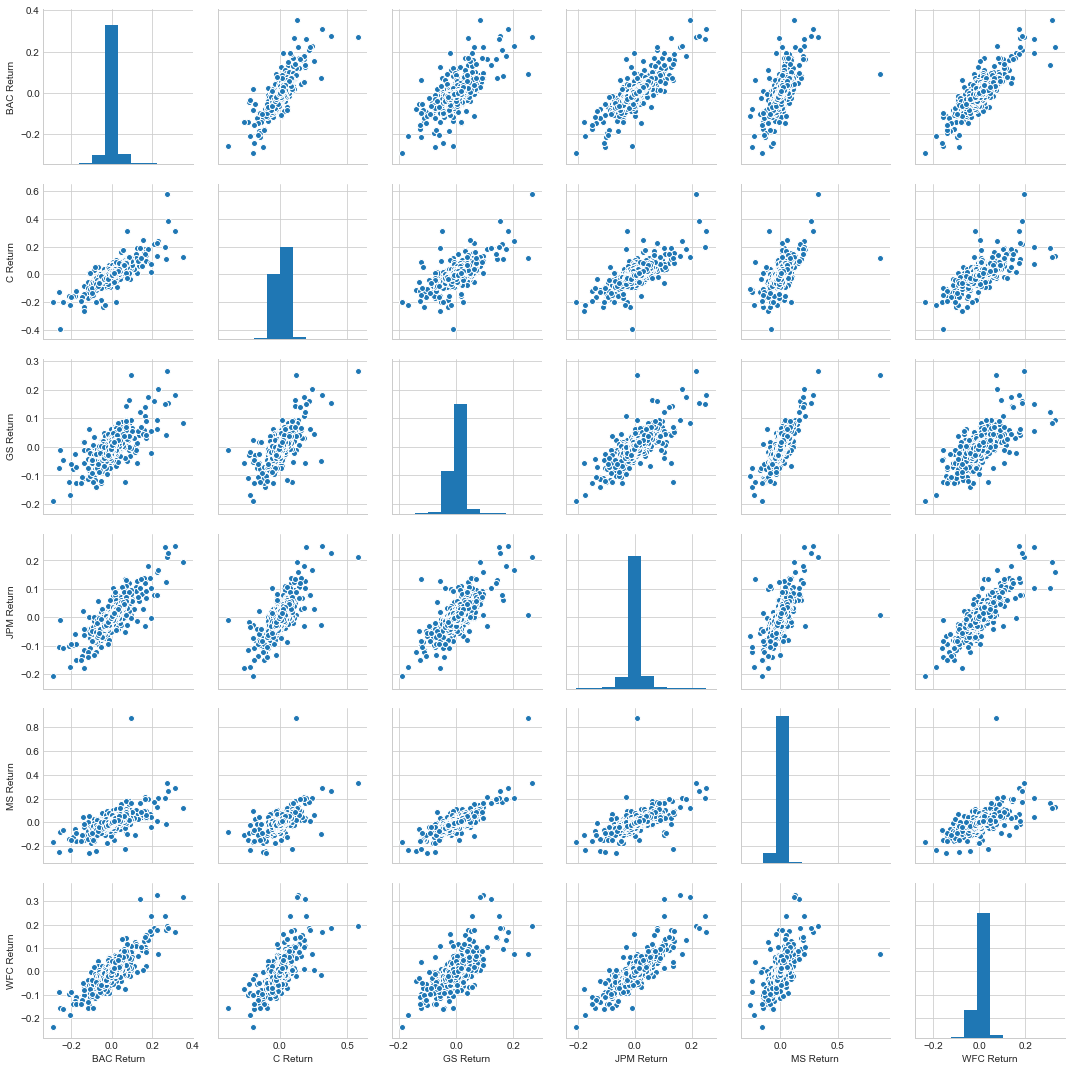

In [48]:
#ploting the pairplot using returns data. 
import seaborn as sns
sns.pairplot(returns[1:])

In [13]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return    1018
C Return      1045
GS Return     1018
JPM Return    1018
MS Return      949
WFC Return    1018
dtype: int64

In [14]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return    1074
C Return       981
GS Return      981
JPM Return    1019
MS Return      951
WFC Return     889
dtype: int64

In [15]:
returns.std() # Citigroup riskiest

BAC Return    0.031526
C Return      0.033362
GS Return     0.023170
JPM Return    0.024475
MS Return     0.032496
WFC Return    0.026714
dtype: float64

In [16]:
start = 0;
end = 0;
for i in range(len(bank_stocks['BAC']["Date"])):
    if bank_stocks['BAC']["Date"][i]=="2015-01-02":
        start = i;
    if bank_stocks['BAC']["Date"][i]=="2015-12-31":
        end = i;
        break;

In [17]:
print(start,end)

2517 2768


In [18]:
bank_stocks['BAC'].iloc[2517:2769,]

Stock Info,Date,Open,High,Low,Close,Adj Close,Volume
2517,2015-01-02,17.990000,18.030001,17.680000,17.900000,15.880880,48951100
2518,2015-01-05,17.790001,17.809999,17.290001,17.379999,15.419531,105605500
2519,2015-01-06,17.420000,17.440001,16.780001,16.860001,14.958190,144912400
2520,2015-01-07,17.139999,17.180000,16.870001,16.940001,15.029169,104603800
2521,2015-01-08,17.160000,17.340000,17.100000,17.290001,15.339688,73388500
...,...,...,...,...,...,...,...
2764,2015-12-24,17.320000,17.379999,17.219999,17.270000,15.509130,29369400
2765,2015-12-28,17.219999,17.230000,16.980000,17.129999,15.383405,41777500
2766,2015-12-29,17.250000,17.350000,17.160000,17.280001,15.518112,45670400
2767,2015-12-30,17.200001,17.240000,17.040001,17.049999,15.311558,35066400


In [19]:
bank_stocks.shape

(4028, 42)

In [20]:
returns.iloc[2517:2769,].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [21]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.013775,-0.008494,-0.006479,-0.018902,-0.010734,0.000808
2,-0.011567,0.012537,-0.004507,0.002083,-0.005787,0.001130
3,-0.001546,0.009699,0.013776,0.005716,0.023645,0.003547
4,-0.010836,-0.005722,-0.004276,-0.008008,-0.003909,-0.001285


C:\Users\ABHI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


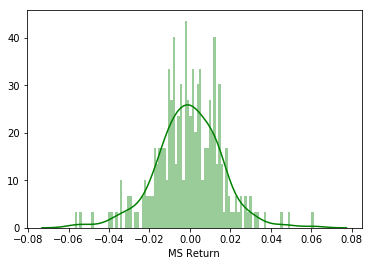

In [22]:
sns.distplot(returns.iloc[2517:2769,]['MS Return'],color='green',bins=100)

In [23]:
s = 0
e = 0
for i in range(len(bank_stocks['C']['Date'])):
    if bank_stocks['C']['Date'][i] == "2008-01-02":
        s = i
    if bank_stocks['C']['Date'][i] == "2008-12-31":
        e = i
        break

In [24]:
print(s,e)

754 1006


In [25]:
bank_stocks['C'].iloc[s:e+1,]

Stock Info,Date,Open,High,Low,Close,Adj Close,Volume
754,2008-01-02,297.299988,298.899994,288.500000,289.200012,238.785522,6214650
755,2008-01-03,292.200012,293.899994,288.899994,289.299988,238.868088,5965790
756,2008-01-04,286.100006,290.299988,280.399994,282.399994,233.170944,7545430
757,2008-01-07,283.399994,287.600006,279.299988,282.600006,233.336044,6891880
758,2008-01-08,284.600006,287.000000,270.100006,271.399994,224.088531,9998940
...,...,...,...,...,...,...,...
1002,2008-12-24,65.500000,68.000000,65.300003,67.800003,59.082066,3998030
1003,2008-12-26,68.400002,70.300003,66.699997,67.300003,58.646358,4805880
1004,2008-12-29,68.300003,68.500000,65.099998,65.699997,57.252075,6103560
1005,2008-12-30,66.599998,68.199997,65.300003,68.000000,59.256336,7337200


C:\Users\ABHI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


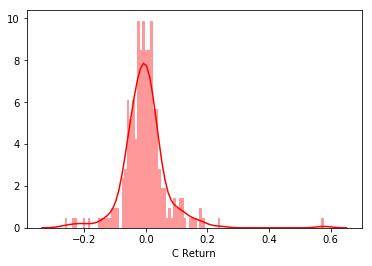

In [26]:
sns.distplot(returns.iloc[754:1006,]['C Return'],color='red',bins=100)

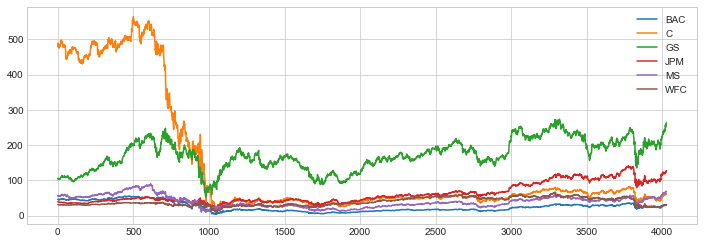

In [28]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

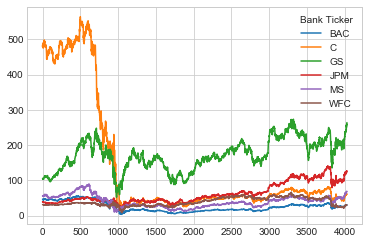

In [29]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [30]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [31]:
bank_stocks["BAC"].iloc[s:e+1,]

Stock Info,Date,Open,High,Low,Close,Adj Close,Volume
754,2008-01-02,41.529999,41.549999,40.349998,40.560001,32.364288,30764600
755,2008-01-03,40.630001,40.810001,40.250000,40.299999,32.156818,22589500
756,2008-01-04,40.000000,40.290001,39.759998,39.849998,31.797749,34921700
757,2008-01-07,40.049999,40.240002,39.259998,39.900002,31.837660,31884400
758,2008-01-08,40.180000,40.209999,38.279999,38.410000,30.648722,42143300
...,...,...,...,...,...,...,...
1002,2008-12-24,12.750000,13.560000,12.740000,13.530000,11.676206,38022300
1003,2008-12-26,13.660000,13.800000,13.290000,13.360000,11.529496,43646200
1004,2008-12-29,13.570000,13.730000,12.680000,12.940000,11.167046,62741300
1005,2008-12-30,13.090000,13.240000,12.660000,13.240000,11.425941,72897800


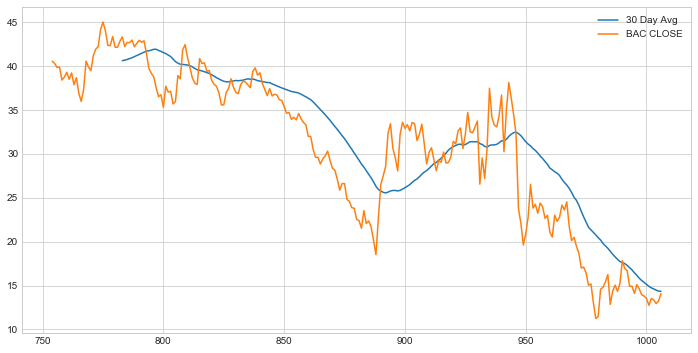

In [32]:
plt.figure(figsize=(12,6))
BAC['Close'].iloc[s:e+1,].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].iloc[s:e+1,].plot(label='BAC CLOSE')
plt.legend()

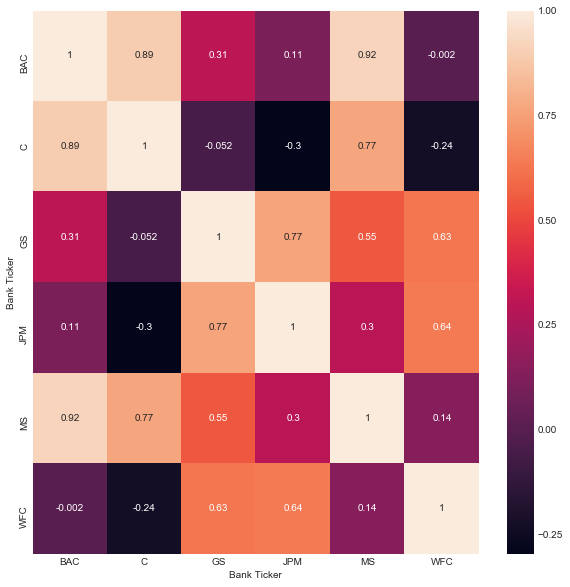

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

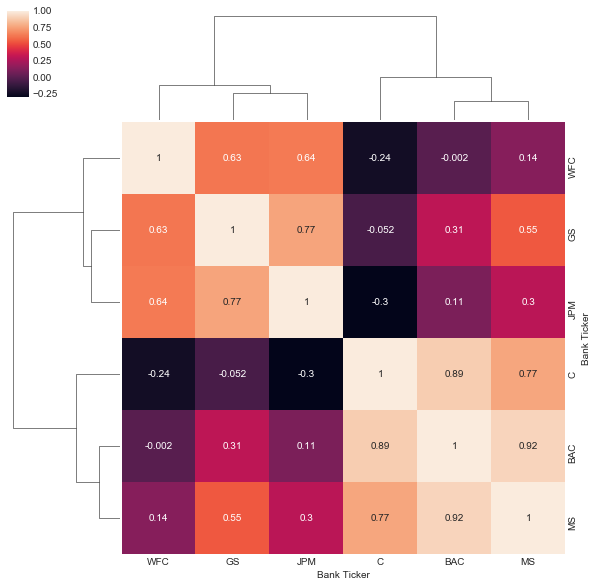

In [34]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [35]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [36]:
bank_stocks["BAC"].iloc[start:end+1,]

Stock Info,Date,Open,High,Low,Close,Adj Close,Volume
2517,2015-01-02,17.990000,18.030001,17.680000,17.900000,15.880880,48951100
2518,2015-01-05,17.790001,17.809999,17.290001,17.379999,15.419531,105605500
2519,2015-01-06,17.420000,17.440001,16.780001,16.860001,14.958190,144912400
2520,2015-01-07,17.139999,17.180000,16.870001,16.940001,15.029169,104603800
2521,2015-01-08,17.160000,17.340000,17.100000,17.290001,15.339688,73388500
...,...,...,...,...,...,...,...
2764,2015-12-24,17.320000,17.379999,17.219999,17.270000,15.509130,29369400
2765,2015-12-28,17.219999,17.230000,16.980000,17.129999,15.383405,41777500
2766,2015-12-29,17.250000,17.350000,17.160000,17.280001,15.518112,45670400
2767,2015-12-30,17.200001,17.240000,17.040001,17.049999,15.311558,35066400


In [37]:
BAC[['Open', 'High', 'Low', 'Close']].iloc[start:end+1,].iplot(kind='candle')

In [39]:
MS['Close'].iloc[start:end+1,].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [40]:
BAC['Close'].iloc[start:end+1,].ta_plot(study='boll')